<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
housing = pd.read_csv("/mnt/c/WSL/learning_2022/datasets/housing.csv")

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [3]:
housing.dropna(axis=0, inplace=True)
housing.drop("ocean_proximity",axis=1, inplace=True)

In [4]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Data set House Pricing
The data set to use is California Price House which contains information about California house prices grouped by sector.
California Price House data set contains 10 columns and 20,640 records.

INFO
- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housingMedianAge: Median age of a house within a block; a lower number is a newer building
- totalRooms: Total number of rooms within a block
- totalBedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- medianHouseValue: Median house value for households within a block (measured in US Dollars)
- oceanProximity: Location of the house w.r.t ocean/sea

### Data exploration and feature engineering

In the previous course EDA (Explanatory Data Analysis) I made all the process of data Explotarion and featuring engineering.
This data set is applied:
- Drop categorical columns.
- Skew analysis.
- Drop uneccesary columns.
- Indentify prediction field.
- Indentify field with most correlation.

In other words, the data set is already prepared. Just left Standard Scaling which will apply in this notebook.

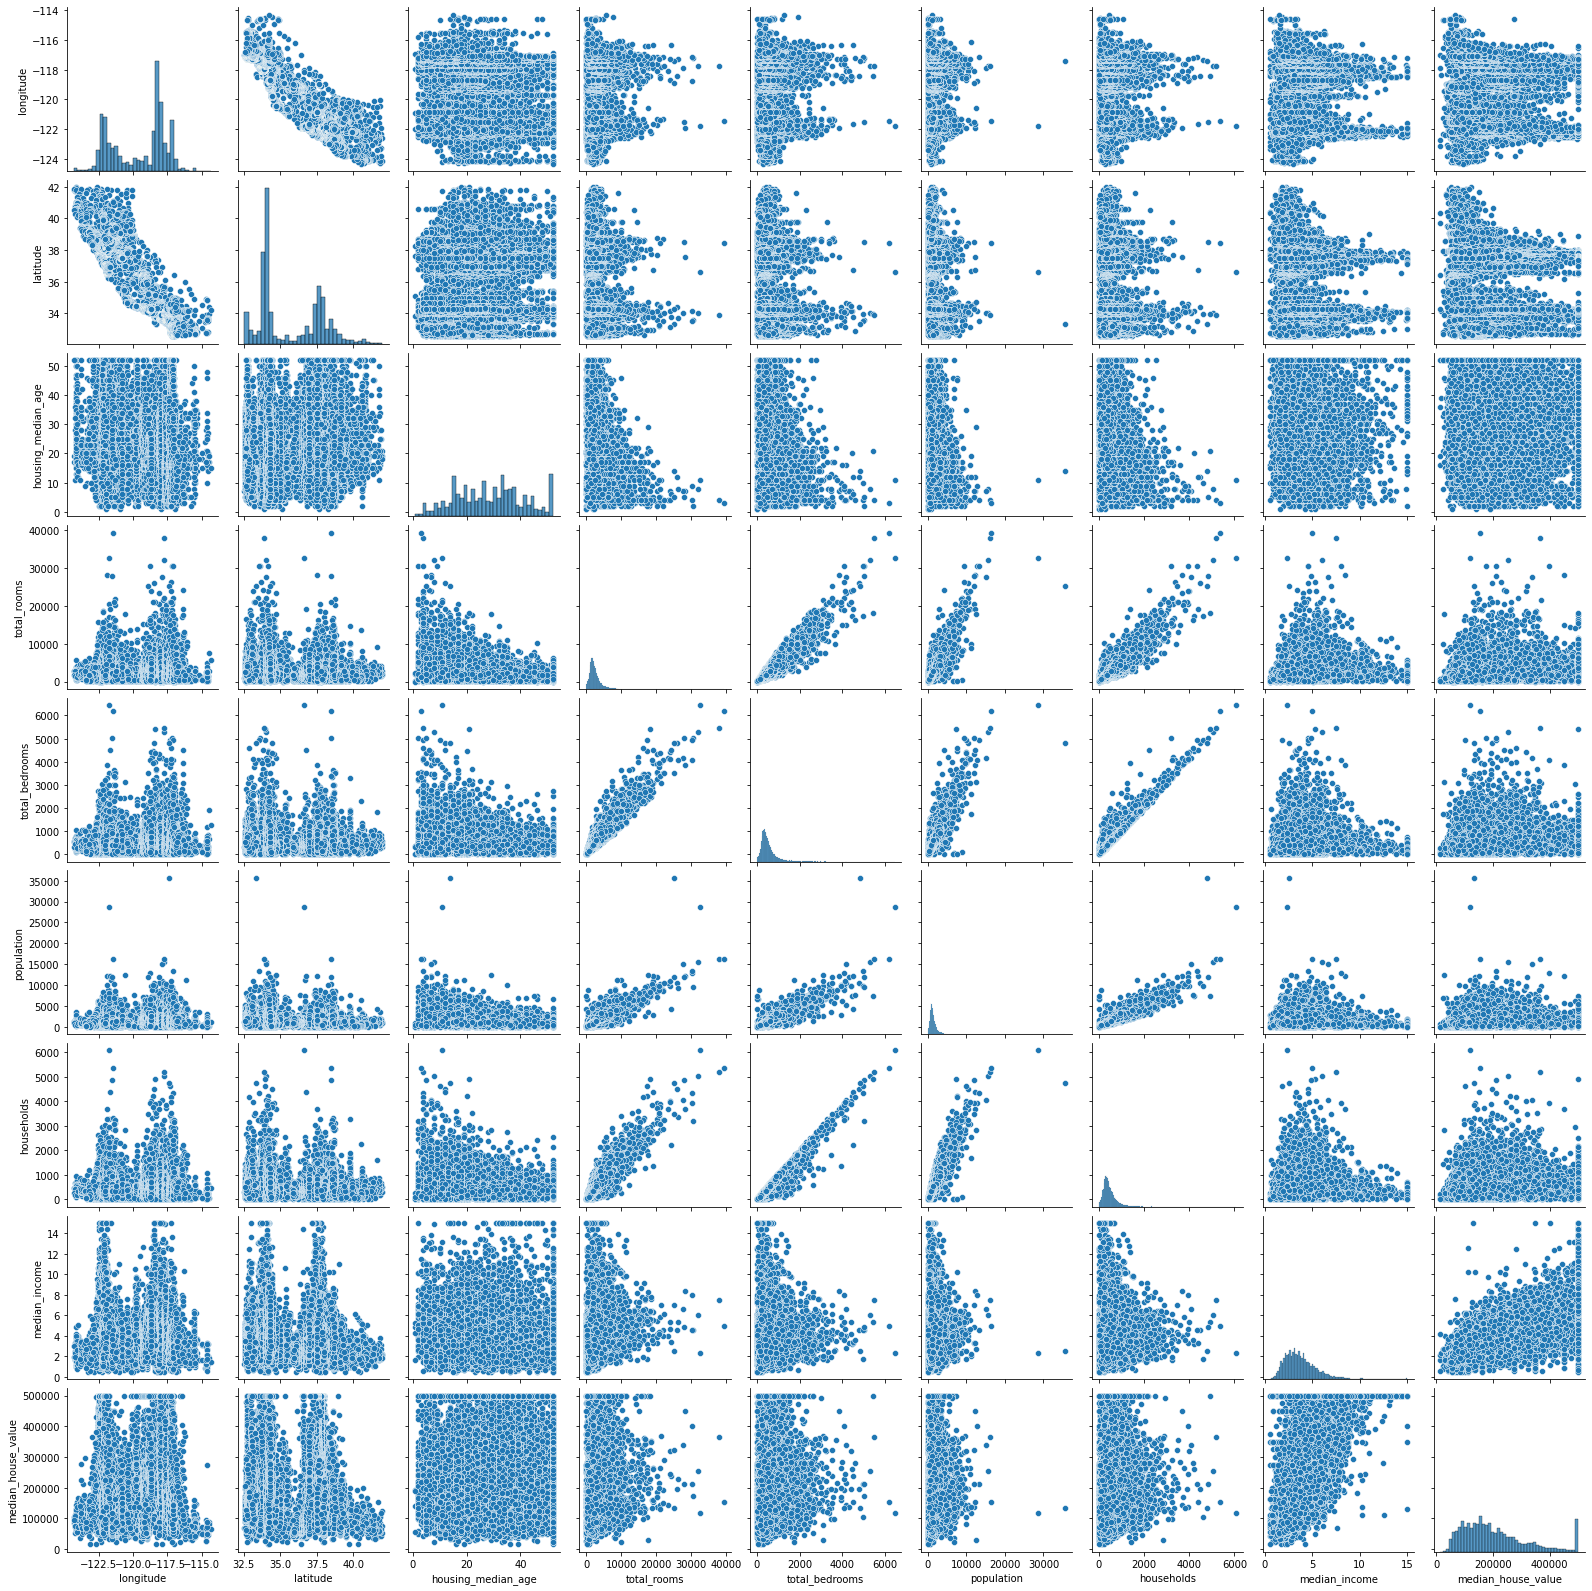

In [17]:
import seaborn as sns
sns.pairplot(housing)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# 2. Objectives


The main objective of this notebook is for prediction. I want to predict the California House Prices based on the variables garthed. I going to use three linear model for accomplish this issue. the model with the best fit will be used.


# 3. Linear Regression Models


In [6]:
X = housing.drop("median_house_value", axis=1)
y = housing[["median_house_value"]]

In [7]:
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for idx_train, idx_test in skf.split(X,y):
    x_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    x_test, y_test = X.iloc[idx_test], y.iloc[idx_test]

/home/bryan/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [8]:
#with normal Linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)
r2_score(y_test, lr_pred)


0.6296248120126812

In [9]:
#scaled Linear regression
ss = StandardScaler()
housing_scaled = ss.fit_transform(housing)
housing_scaled = pd.DataFrame(housing_scaled, columns=housing.columns)

X_scaled = housing.drop("median_house_value", axis=1)
y_scaled = housing[["median_house_value"]]

for idx_train, idx_test in skf.split(X_scaled, y_scaled):
    x_train_scaled, y_train_scaled = X.iloc[idx_train], y.iloc[idx_train]
    x_test_scaled, y_test_scaled = X.iloc[idx_test], y.iloc[idx_test]

lr_scl = LinearRegression()
lr_scl.fit(x_train_scaled, y_train_scaled)

lr_pred_scl = lr_scl.predict(x_test_scaled)
r2_score(y_test, lr_pred_scl)


/home/bryan/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


0.6296248120126812

In [10]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [11]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [12]:
features = ['housing_median_age', 'households']
pf.fit(housing[features])

feat_array = pf.transform(housing[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

/home/bryan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,housing_median_age,households,housing_median_age^2,housing_median_age households,households^2
0,1.0,41.0,126.0,1681.0,5166.0,15876.0
1,1.0,21.0,1138.0,441.0,23898.0,1295044.0
2,1.0,52.0,177.0,2704.0,9204.0,31329.0
3,1.0,52.0,219.0,2704.0,11388.0,47961.0
4,1.0,52.0,259.0,2704.0,13468.0,67081.0
...,...,...,...,...,...,...
20428,1.0,25.0,330.0,625.0,8250.0,108900.0
20429,1.0,18.0,114.0,324.0,2052.0,12996.0
20430,1.0,17.0,433.0,289.0,7361.0,187489.0
20431,1.0,18.0,349.0,324.0,6282.0,121801.0


In [13]:
pf_pred = lr_scl.predict(x_test)
r2_score(y_test, pf_pred)

0.6296248120126812

# 4. Insights and key findings


As we see, we used normal linear regression and with scaled variables, polynomial regression and so on... All is throwing the same result this could be I need to drop some columns or try with another data set. With this data set all is the same result which mean I could use normal linear regression model. 

# 5. Next Steps


For better prediction we need more data and I could use more features.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
